In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [3]:
ls

 174616_394223_bundle_archive/      best_modellstmmulti.01-0.66.h5
 174616_394223_bundle_archive.zip   best_modellstmmulti.01-0.68.h5
'AQayyumCV_2020 (1).pdf'            best_modellstmmulti.01-0.84.h5
 AQayyumCV_2020.pdf                 best_modellstmmulti.02-0.48.h5
 AQ_paper_V1.docx                   best_modellstmmulti.02-0.54.h5
 best_model.01-0.24.h5              best_modellstmmulti.02-0.60.h5
 best_model.01-0.64.h5              best_modellstmmulti.02-0.63.h5
 best_model.01-0.65.h5              best_modellstmmulti.02-0.67.h5
 best_model.01-0.66.h5              best_modellstmmulti.02-0.80.h5
 best_model.01-0.69.h5              best_modellstmmulti.03-0.46.h5
 best_model.02-0.18.h5              best_modellstmmulti.03-0.49.h5
 best_model.02-0.62.h5              best_modellstmmulti.03-0.58.h5
 best_model.02-0.63.h5              best_modellstmmulti.03-0.60.h5
 best_model.02-0.67.h5              best_modellstmmulti.03-0.66.h5
 best_model.03-0.14.h5              best_modellstmmulti.03-0.7

In [4]:
!unzip dataheart.zip

Archive:  dataheart.zip
   creating: dataheart/
  inflating: dataheart/dataheat.pkl  


In [ ]:
#%% Heart features for radiomic
import os
import glob
import os
import pandas as pd
import numpy as np
import logging
from radiomics import featureextractor
import radiomics
import six, numpy as np    
import SimpleITK as sitk

elongation = []
flatness = []
patient_id = []
elongation = []
flatness = []
majAL = []
minAL = []
threedimdiam = []
spher = []
surfArea = []
energ = []
entrop = []
kurt = []
mean = []
skew = []
cont = []
correl = []
idm = []
coarse = []
complexity = []
strength = []
y_labels = []
case_idn=[]
settings = {}
settings['binWidth'] = 25
settings['resampledPixelSpacing'] = None
settings['interpolator'] = 'sitkBSpline'
settings['verbose'] = True

path='D:\\Moonacompitionemdic\\emidec-dataset-1.0.1 (1)\\Heartdataset2020\\Normal'
pathlist=os.listdir(path)
for idx, volume in enumerate(pathlist):
    total_imgs = []
    cur_file = os.path.join(path, volume)
    print(idx, cur_file)
    image_file=os.path.join(cur_file,'Images'+'\\'+str(volume)+'.nii.gz')
    mask_file=os.path.join(cur_file,'Contours'+'\\'+str(volume)+'.nii.gz')
    img_l=sitk.ReadImage(image_file)
    mask_l=sitk.ReadImage(mask_file)
    extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
    #print(extractor.enableFeatureClassByName('glcm'))
    featureVector = extractor.execute(img_l, mask_l)
    #print(featureVector)
    elongation.append(featureVector['original_shape_Elongation'])
    flatness.append(featureVector['original_shape_Flatness'])
    majAL.append(featureVector['original_shape_MajorAxisLength'])
    minAL.append(featureVector['original_shape_MinorAxisLength'])
    threedimdiam.append(featureVector['original_shape_Maximum3DDiameter'])
    spher.append(featureVector['original_shape_Sphericity'])
    surfArea.append(featureVector['original_shape_SurfaceArea'])
    energ.append(featureVector['original_firstorder_Energy'])
    entrop.append(featureVector['original_firstorder_Entropy'])
    kurt.append(featureVector['original_firstorder_Kurtosis'])
    mean.append(featureVector['original_firstorder_Mean'])
    skew.append(featureVector['original_firstorder_Skewness'])
    cont.append(featureVector['original_glcm_Contrast'])
    correl.append(featureVector['original_glcm_Correlation'])
    idm.append(featureVector['original_glcm_Idm'])
    coarse.append(featureVector['original_ngtdm_Coarseness'])
    complexity.append(featureVector['original_ngtdm_Complexity'])
    strength.append(featureVector['original_ngtdm_Strength'])
    y_labels.append(1)
    case_idn.append(volume)

raw_data = {
    'elongation':elongation,
    'flatness':flatness,
    'major_axis_length':majAL,
    'minor_axis_length':minAL,
    'max_3D_diameter':threedimdiam,
    'sphericity':spher,
    'surface_area':surfArea,
    'energy':energ,
    'entropy':entrop,
    'kurtosis':kurt,
    'mean':mean,
    'skewness':skew,
    'contrast':cont,
    'correlation':correl,
    'inverse_diff_moment':idm,
    'coarseness':coarse,
    'complexity':complexity,
    'strength':strength,
    'y_labels':y_labels
}


# save to pandas dataframe
dfnormal = pd.DataFrame(raw_data, index = case_idn)
# y = df[['y_labels']]
# dfh = df.drop(['y_labels'], axis=1)
dfnormal.head()

In [ ]:
#%% Radiomics features for pathlogical class
import os
import glob
import os
import pandas as pd
import numpy as np
import logging
from radiomics import featureextractor
import radiomics
import six, numpy as np    
import SimpleITK as sitk

elongation = []
flatness = []
patient_id = []
elongation = []
flatness = []
majAL = []
minAL = []
threedimdiam = []
spher = []
surfArea = []
energ = []
entrop = []
kurt = []
mean = []
skew = []
cont = []
correl = []
idm = []
coarse = []
complexity = []
strength = []
y_labels = []
case_idd=[]
settings = {}
settings['binWidth'] = 25
settings['resampledPixelSpacing'] = None
settings['interpolator'] = 'sitkBSpline'
settings['verbose'] = True

path='D:\\Moonacompitionemdic\\emidec-dataset-1.0.1 (1)\\Heartdataset2020\\Disease'
pathlist=os.listdir(path)
for idx, volume in enumerate(pathlist):
    total_imgs = []
    cur_file = os.path.join(path, volume)
    print(idx, cur_file)
    image_file=os.path.join(cur_file,'Images'+'\\'+str(volume)+'.nii.gz')
    mask_file=os.path.join(cur_file,'Contours'+'\\'+str(volume)+'.nii.gz')
    img_l=sitk.ReadImage(image_file)
    mask_l=sitk.ReadImage(mask_file)
    extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
    #print(extractor.enableFeatureClassByName('glcm'))
    featureVector = extractor.execute(img_l, mask_l)
    #print(featureVector)
    elongation.append(featureVector['original_shape_Elongation'])
    flatness.append(featureVector['original_shape_Flatness'])
    majAL.append(featureVector['original_shape_MajorAxisLength'])
    minAL.append(featureVector['original_shape_MinorAxisLength'])
    threedimdiam.append(featureVector['original_shape_Maximum3DDiameter'])
    spher.append(featureVector['original_shape_Sphericity'])
    surfArea.append(featureVector['original_shape_SurfaceArea'])
    energ.append(featureVector['original_firstorder_Energy'])
    entrop.append(featureVector['original_firstorder_Entropy'])
    kurt.append(featureVector['original_firstorder_Kurtosis'])
    mean.append(featureVector['original_firstorder_Mean'])
    skew.append(featureVector['original_firstorder_Skewness'])
    cont.append(featureVector['original_glcm_Contrast'])
    correl.append(featureVector['original_glcm_Correlation'])
    idm.append(featureVector['original_glcm_Idm'])
    coarse.append(featureVector['original_ngtdm_Coarseness'])
    complexity.append(featureVector['original_ngtdm_Complexity'])
    strength.append(featureVector['original_ngtdm_Strength'])
    y_labels.append(0)
    case_idd.append(volume)

raw_data = {
    'elongation':elongation,
    'flatness':flatness,
    'major_axis_length':majAL,
    'minor_axis_length':minAL,
    'max_3D_diameter':threedimdiam,
    'sphericity':spher,
    'surface_area':surfArea,
    'energy':energ,
    'entropy':entrop,
    'kurtosis':kurt,
    'mean':mean,
    'skewness':skew,
    'contrast':cont,
    'correlation':correl,
    'inverse_diff_moment':idm,
    'coarseness':coarse,
    'complexity':complexity,
    'strength':strength,
    'y_labels':y_labels
}


# save to pandas dataframe
dfdisease = pd.DataFrame(raw_data, index = case_idd)
# y = df[['y_labels']]
# dfh = df.drop(['y_labels'], axis=1)
dfdisease.head()

In [ ]:
#%%
df_combine = pd.concat([dfnormal, dfdisease], axis = 0)

y = df_combine[['y_labels']]
df= df_combine.drop(['y_labels'], axis=1)

from sklearn import preprocessing

case_idnew1=case_idn+case_idd

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled, index = case_idnew1)
normalized_df.columns = df.columns

normalized_df = pd.concat([normalized_df, y], axis = 1)
normalized_df.head()

from sklearn.utils import shuffle
shuffled = shuffle(normalized_df)
shuffled.head()

In [5]:
import pandas as pd
shuffled=pd.read_pickle('/content/drive/My Drive/dataheart/dataheat.pkl')
shuffled.head()

,elongation,flatness,major_axis_length,minor_axis_length,max_3D_diameter,sphericity,surface_area,energy,entropy,kurtosis,mean,skewness,contrast,correlation,inverse_diff_moment,coarseness,complexity,strength,y_labels
Case_P062,0.506435,0.561940,0.368460,0.487988,0.387910,0.792820,0.362174,0.263419,0.417369,0.245064,0.302564,0.517063,0.160359,0.191860,0.317208,0.110641,0.077633,0.058907,0
Case_P069,0.460072,0.437957,0.369358,0.439475,0.373793,0.755782,0.276591,0.264019,0.827794,0.175957,0.649295,0.473754,0.370988,0.743512,0.185926,0.335214,0.333114,0.506231,0
Case_N079,0.438494,0.469608,0.434231,0.484151,0.440649,0.979704,0.350847,0.209318,0.401487,0.406820,0.412455,0.320325,0.224773,0.088979,0.367902,0.114664,0.117767,0.112691,1
Case_N027,0.129713,0.034770,0.608649,0.277453,0.673698,0.223601,0.269573,0.202732,0.521678,0.051847,0.320813,0.571091,0.185067,0.590840,0.365754,0.210358,0.052188,0.053889,1
Case_P044,0.298799,0.303101,0.364751,0.262995,0.334291,0.589833,0.173773,0.149927,0.780568,0.116908,0.559743,0.473235,0.415067,0.671400,0.151268,0.387657,0.228754,0.334403,0


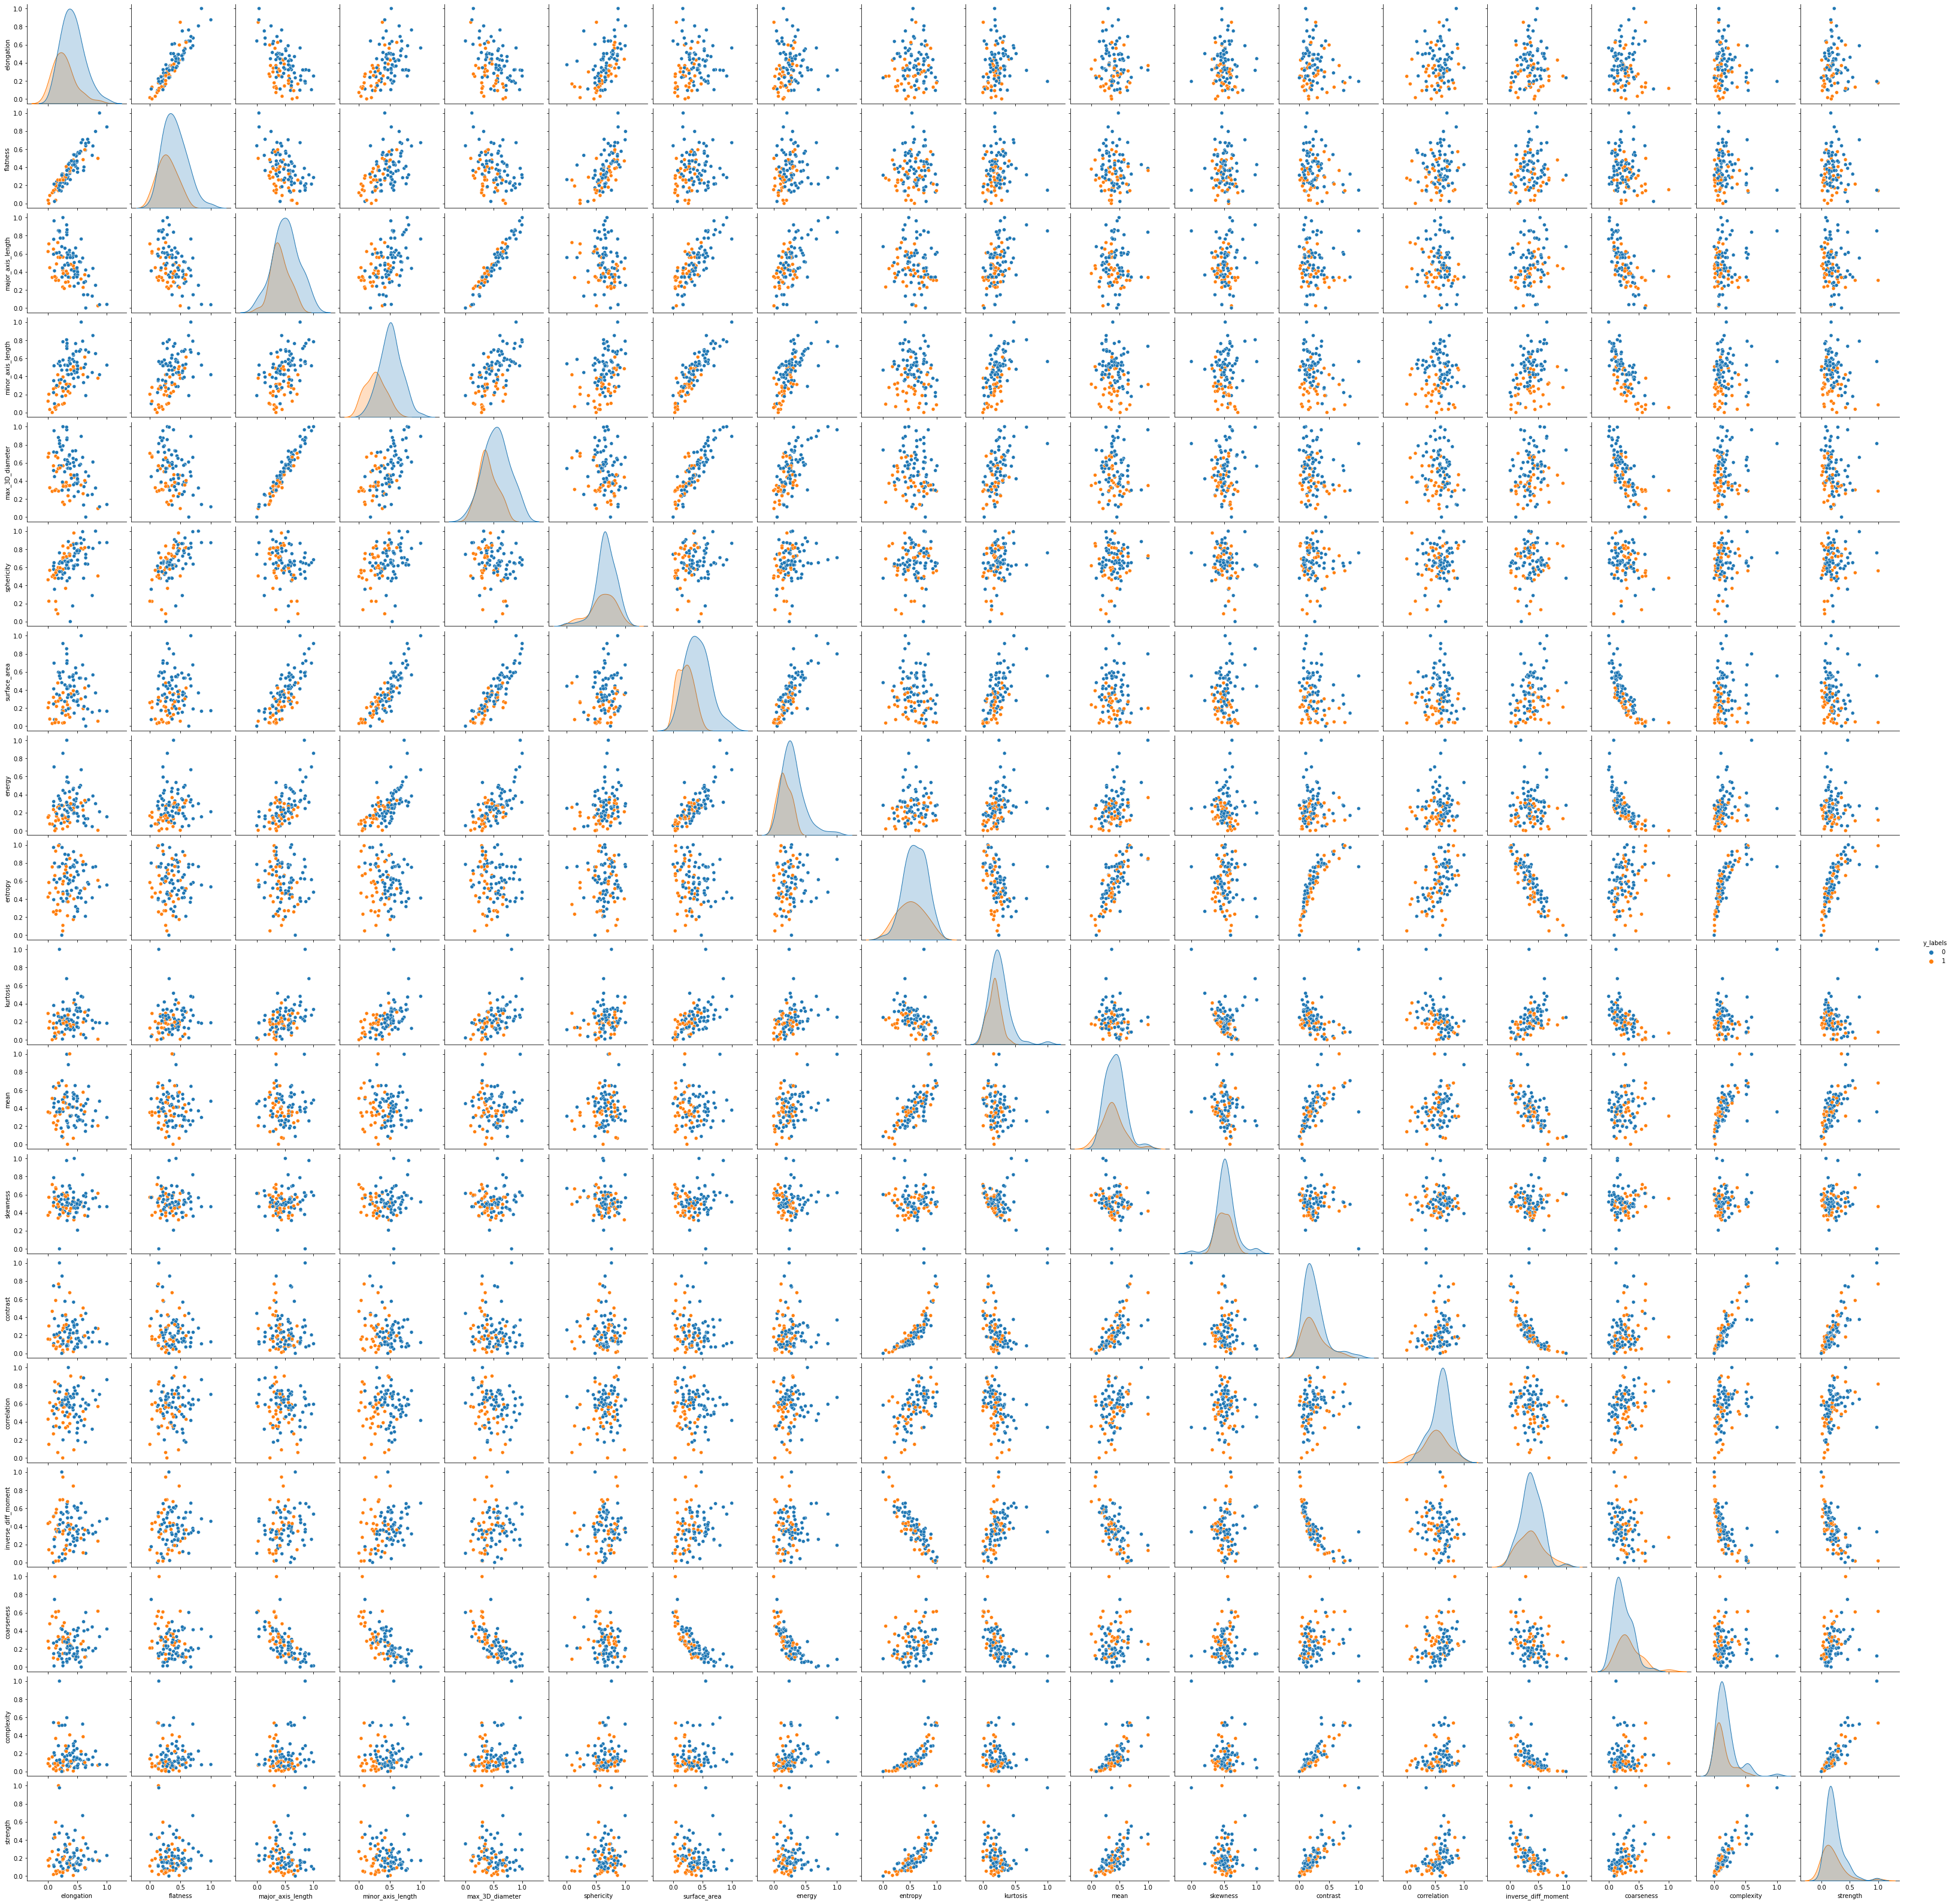

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(shuffled, hue = 'y_labels')
plt.show()

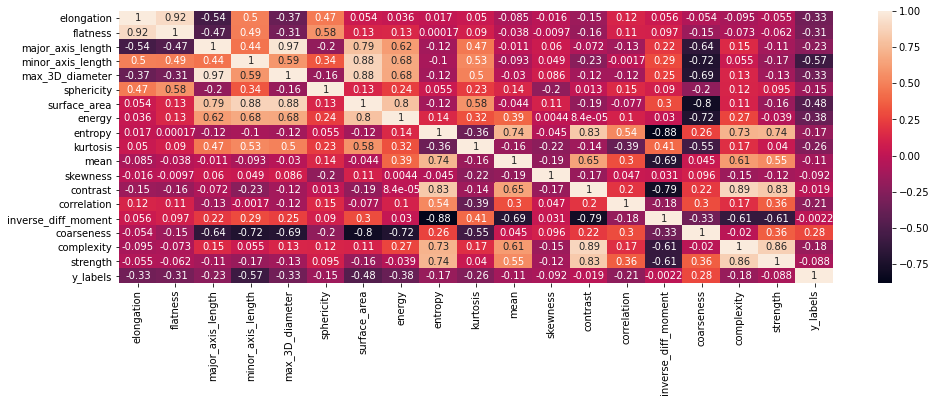

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(shuffled.corr(), annot = True)

In [8]:
# split feature matrix into training(80%)and testing(20%)
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(shuffled.loc[:, 'elongation':'strength'], np.ravel(shuffled[['y_labels']]),
                                                   test_size = 0.2, random_state = 42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 18)
(20, 18)
(80,)
(20,)


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
rf_mod = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state= 10, verbose= 1)
rf_mod.fit(X_train, y_train)

print("Train score: ",rf_mod.score(X_train, y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score:  1.0


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [11]:
# prediction on test data
pred_rf = rf_mod.predict(X_test)
print('Test score:',rf_mod.score(X_test, y_test))

Test score: 0.85


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [12]:
# classification report using random forest
print("Classification report: ",classification_report(pred_rf,y_test))
print("Average weighted precision: ",precision_score(y_test,pred_rf))
print("Average weighted recall: ",recall_score(y_test,pred_rf))
print("Average weighted f1 score: ",f1_score(y_test,pred_rf))

Classification report:                precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.83      0.71      0.77         7

    accuracy                           0.85        20
   macro avg       0.85      0.82      0.83        20
weighted avg       0.85      0.85      0.85        20

Average weighted precision:  0.7142857142857143
Average weighted recall:  0.8333333333333334
Average weighted f1 score:  0.7692307692307692


In [13]:
lg_mod = LogisticRegression()
lg_mod.fit(X_train, y_train)

print("Train score: ",lg_mod.score(X_train, y_train))

Train score:  0.8375


In [14]:
pred_lg = lg_mod.predict(X_test)
print('Test score:',lg_mod.score(X_test, y_test))

Test score: 0.9


In [15]:
print("Classification report: ",classification_report(pred_lg,y_test))
print("Average weighted precision: ",precision_score(y_test,pred_lg))
print("Average weighted recall: ",recall_score(y_test,pred_lg))
print("Average weighted f1 score: ",f1_score(y_test,pred_lg))

Classification report:                precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.83      0.83      0.83         6

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20

Average weighted precision:  0.8333333333333334
Average weighted recall:  0.8333333333333334
Average weighted f1 score:  0.8333333333333334


In [16]:
"""**Gradient Boosting:**

The Gradient Boosting classifier, an ensemble technique, is based on the idea of creating several weak learners (A learner which is slightly better than random chance) to minimize loss of the model via a gradient descent like procedure. Every learner learns on a different diffcult pattern and together a majority vote predicts the target class.
"""

gb_mod = GradientBoostingClassifier(n_estimators=200, random_state= 10)
gb_mod.fit(X_train, y_train)

print("Train score: ",gb_mod.score(X_train, y_train))

Train score:  1.0


In [17]:
pred_gb = gb_mod.predict(X_test)
print('Test score:',gb_mod.score(X_test, y_test))

Test score: 0.85


In [18]:
print("Classification report: ",classification_report(pred_gb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_gb))
print("Average weighted recall: ",recall_score(y_test,pred_gb))
print("Average weighted f1 score: ",f1_score(y_test,pred_gb))

Classification report:                precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.67      0.80         9

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20

Average weighted precision:  0.6666666666666666
Average weighted recall:  1.0
Average weighted f1 score:  0.8


In [19]:
"""**Gaussian Naive Bayes:**
Naive Bayes is a simple algorthim, that can predict the relative probability of a target class and thus classify them. It uses the Bayes theorem to calculate the probability of an input data point belonging to a target class [ P(target class|input) ]. It assumes there exist no correlation between the features and thus is Naive.
"""

gnb_mod = GaussianNB()
gnb_mod.fit(X_train, y_train)

print("Train score: ",gnb_mod.score(X_train, y_train))

Train score:  0.7625


In [20]:
pred_nb = gnb_mod.predict(X_test)
print('Test score:',gnb_mod.score(X_test, y_test))

Test score: 0.6


In [21]:
print("Classification report: ",classification_report(pred_nb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_nb))
print("Average weighted recall: ",recall_score(y_test,pred_nb))
print("Average weighted f1 score: ",f1_score(y_test,pred_nb))

Classification report:                precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.83      0.42      0.56        12

    accuracy                           0.60        20
   macro avg       0.67      0.65      0.60        20
weighted avg       0.70      0.60      0.59        20

Average weighted precision:  0.4166666666666667
Average weighted recall:  0.8333333333333334
Average weighted f1 score:  0.5555555555555556


In [22]:
"""**Multi-Layer Perceptron:**
A Multi-Layer Perceptron classifier is a neural network classifier that applies the Error Back Propogation Training (EBPT) algorithm to learn weights for the network that suitably classify the input pattern space to target classes.
"""

mlp_mod = MLPClassifier(hidden_layer_sizes=[100,50])
mlp_mod.fit(X_train, y_train)

print("Train score: ",mlp_mod.score(X_train, y_train))

Train score:  0.95


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
pred_mlp = mlp_mod.predict(X_test)
print('Test score:',mlp_mod.score(X_test, y_test))

Test score: 0.7


In [24]:
print("Classification report: ",classification_report(pred_mlp,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_mlp))
print("Average weighted recall: ",recall_score(y_test,pred_mlp))
print("Average weighted f1 score: ",f1_score(y_test,pred_mlp))

Classification report:                precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.67      0.50      0.57         8

    accuracy                           0.70        20
   macro avg       0.69      0.67      0.67        20
weighted avg       0.70      0.70      0.69        20

Average weighted precision:  0.5
Average weighted recall:  0.6666666666666666
Average weighted f1 score:  0.5714285714285715


In [25]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
modelBagging = BaggingClassifier()
# fit the model on the whole dataset
#model.fit(X, y)
modelBagging.fit(X_train, y_train)

print("Train score: ",modelBagging.score(X_train, y_train))

Train score:  0.9875


In [26]:
modelBaggingpred = modelBagging.predict(X_test)
print('Test score:',modelBagging.score(X_test, y_test))

Test score: 0.65


In [27]:
print("Classification report: ",classification_report(modelBaggingpred,y_test))

print("Average weighted precision: ",precision_score(y_test,modelBaggingpred))
print("Average weighted recall: ",recall_score(y_test,modelBaggingpred))
print("Average weighted f1 score: ",f1_score(y_test,modelBaggingpred))

Classification report:                precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.83      0.45      0.59        11

    accuracy                           0.65        20
   macro avg       0.70      0.67      0.64        20
weighted avg       0.72      0.65      0.64        20

Average weighted precision:  0.45454545454545453
Average weighted recall:  0.8333333333333334
Average weighted f1 score:  0.5882352941176471


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()

ExtraTreesClassifier.fit(X_train, y_train)

print("Train score: ",ExtraTreesClassifier.score(X_train, y_train))

Train score:  1.0


In [29]:
ExtraTreesClassifiermodel= ExtraTreesClassifier.predict(X_test)
print('Test score:',ExtraTreesClassifier.score(X_test, y_test))

Test score: 0.85


In [30]:
print("Classification report: ",classification_report(ExtraTreesClassifiermodel,y_test))

print("Average weighted precision: ",precision_score(y_test,ExtraTreesClassifiermodel))
print("Average weighted recall: ",recall_score(y_test,ExtraTreesClassifiermodel))
print("Average weighted f1 score: ",f1_score(y_test,ExtraTreesClassifiermodel))

Classification report:                precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.83      0.71      0.77         7

    accuracy                           0.85        20
   macro avg       0.85      0.82      0.83        20
weighted avg       0.85      0.85      0.85        20

Average weighted precision:  0.7142857142857143
Average weighted recall:  0.8333333333333334
Average weighted f1 score:  0.7692307692307692


In [31]:
no_skill_prob = [0 for _ in range(len(y_test))]
no_skill_auc = roc_auc_score(y_test, no_skill_prob)
print("No Skill AUC: ", no_skill_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill_prob)

No Skill AUC:  0.5


In [32]:
# Random Forest
rf_prob = rf_mod.predict_proba(X_test)[:,-1]
rf_auc = roc_auc_score(y_test,rf_prob)
print("RandomForest AUC: ", rf_auc)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

RandomForest AUC:  0.9226190476190477


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [33]:
# Gussian Naive Bayes
nb_prob = gnb_mod.predict_proba(X_test)[:,-1]
nb_auc = roc_auc_score(y_test, nb_prob)
print("Gaussian Naive Bayes AUC: ", nb_auc)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)

Gaussian Naive Bayes AUC:  0.9166666666666667


In [34]:
# gradient boosting
gb_prob = gb_mod.predict_proba(X_test)[:,-1]
gb_auc = roc_auc_score(y_test, gb_prob)
print("GradientBoosting AUC: ", gb_auc)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_prob)

GradientBoosting AUC:  0.9642857142857143


In [35]:
# Multi-Layer perceptron
mlp_prob = mlp_mod.predict_proba(X_test)[:,-1]
mlp_auc = roc_auc_score(y_test, mlp_prob)
print("MultiLayer Perceptron AUC: ", mlp_auc)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_prob)

MultiLayer Perceptron AUC:  0.8095238095238095


In [36]:
# Bagging tree
bg_prob = modelBagging.predict_proba(X_test)[:,-1]
bg_auc = roc_auc_score(y_test, bg_prob)
print("Bagging Tree AUC: ", bg_auc)
bg_fpr, bg_tpr, _ = roc_curve(y_test, bg_prob)

Bagging Tree AUC:  0.8988095238095237


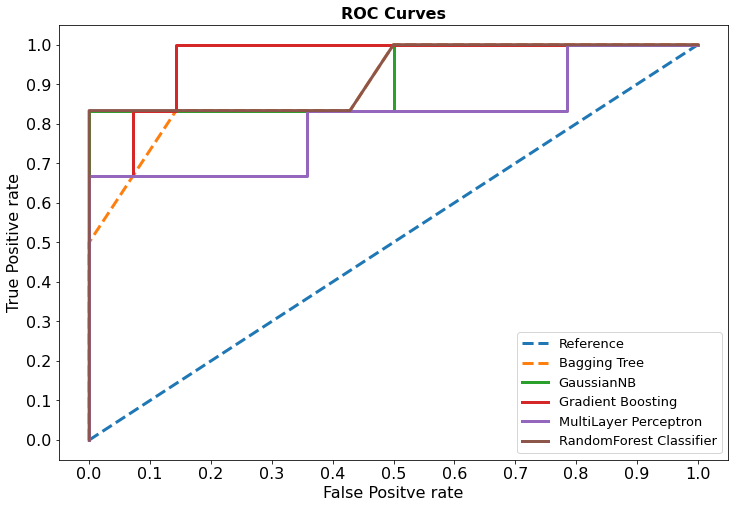

In [37]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(ns_fpr, ns_tpr, linestyle= '--', linewidth=3.0,label= 'Reference')
#ax.plot(rf_fpr, rf_tpr, linestyle= '-', linewidth=3.0,label= 'LSTM Classifier')
ax.plot(bg_fpr, bg_tpr, linestyle= '--', linewidth=3.0,label= 'Bagging Tree')
#ax.plot(LR8_fpr, LR8_tpr, linestyle='-', label= 'LogisticRegression')
ax.plot(nb_fpr, nb_tpr, linestyle='-', linewidth=3.0,label= 'GaussianNB')
ax.plot(gb_fpr, gb_tpr, linestyle='-',linewidth=3.0, label= 'Gradient Boosting')
ax.plot(mlp_fpr, mlp_tpr, linestyle='-', linewidth=3.0,label= 'MultiLayer Perceptron')
#ax.plot(ET8_fpr, ET8_tpr, linestyle='-', label= 'Extra Trees Classifier')
ax.plot(rf_fpr, rf_tpr, linestyle='-',linewidth=3.0, label= 'RandomForest Classifier')
plt.xticks(np.arange(0.0, 1.1, step=0.1),fontsize=16)
plt.xlabel('False Positve rate',fontsize=16)
plt.yticks(np.arange(0.0, 1.1, step=0.1),fontsize=16)
plt.ylabel('True Positive rate',fontsize=16)
#plt.title('ROC curve')
plt.title('ROC Curves', fontweight='bold', fontsize=16)
#plt.xlim([0,0.6])
#plt.ylim([0.9,1])
plt.legend(prop={'size':13}, loc='lower right')
#ax.legend(loc="bottom right",fontweight='bold')
plt.savefig('heartroc.png',dpi=100)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


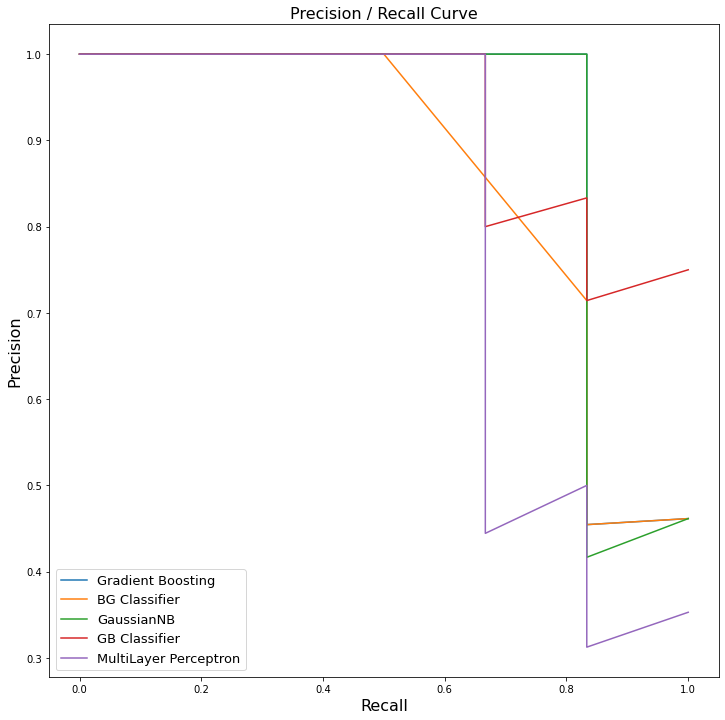

In [38]:
rf_prob = rf_mod.predict_proba(X_test)[:,-1]

nb_prob = gnb_mod.predict_proba(X_test)[:,-1]

gb_prob = gb_mod.predict_proba(X_test)[:,-1]

mlp_prob = mlp_mod.predict_proba(X_test)[:,-1]


bg_prob = modelBagging.predict_proba(X_test)[:,-1]



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score, precision_recall_curve
from IPython.display import display

def plot_pr_curves(y_true, y_score_dict, size=(8, 5), average='weighted'):
    """
    Plots the precision-recall curve for a multiple estimators.
    :param y_true: True labels.
    :param y_score_dict: Dictionary containing the estimator name as keys and the predicted label probabilities
           as values.
    :param size: Size of the plot.
    :param average: Average parameter used for the calculation of the average precision score.
    :return: None
    """
    plt.figure(figsize=size)

    for name, y_score in y_score_dict.items():
        precisions, recalls, _ = precision_recall_curve(y_true, y_score)
        pr_auc = average_precision_score(y_true, y_score, average=average)
        plt.plot(recalls, precisions, label='{}'.format(name, pr_auc))

    plt.title('Precision / Recall Curve',fontsize=16)
    plt.xlabel('Recall',fontsize=16)
    plt.ylabel('Precision',fontsize=16)
    plt.legend(prop={'size':13},loc='lower left')
    plt.savefig('ROCs.png',dpi=100)


#################################################################LSTM #################################
plot_pr_curves(y_test, 
               {
                   'Gradient Boosting': rf_prob,
                   'BG Classifier': bg_prob,
                   'GaussianNB': nb_prob,
                   'GB Classifier': gb_prob,
                   'MultiLayer Perceptron': mlp_prob,
               }, 
               size=(12, 12))

In [39]:
#%%  submit results in table forms
rf_prob = rf_mod.predict_proba(X_test)[:,-1]
rf_auc = roc_auc_score(y_test,rf_prob)
print("RandomForest AUC: ", rf_auc)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)


nb_prob = gnb_mod.predict_proba(X_test)[:,-1]
nb_auc = roc_auc_score(y_test, nb_prob)
print("Gaussian Naive Bayes AUC: ", nb_auc)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)

gb_prob = gb_mod.predict_proba(X_test)[:,-1]
gb_auc = roc_auc_score(y_test, gb_prob)
print("GradientBoosting AUC: ", gb_auc)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_prob)

mlp_prob = mlp_mod.predict_proba(X_test)[:,-1]
mlp_auc = roc_auc_score(y_test, mlp_prob)
print("MultiLayer Perceptron AUC: ", mlp_auc)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_prob)


bg_prob = modelBagging.predict_proba(X_test)[:,-1]
bg_auc = roc_auc_score(y_test, bg_prob)
print("Bagging Tree AUC: ", bg_auc)
bg_fpr, bg_tpr, _ = roc_curve(y_test, bg_prob)

RandomForest AUC:  0.9226190476190477
Gaussian Naive Bayes AUC:  0.9166666666666667
GradientBoosting AUC:  0.9642857142857143
MultiLayer Perceptron AUC:  0.8095238095238095
Bagging Tree AUC:  0.8988095238095237


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

models = {
    'Random Classifier':rf_mod, 
    'Extra Classifier': ExtraTreesClassifier,
    'Gaussian Naive Bayes': gnb_mod,
    'Gradient Boosting':gb_mod,
    'Multi-Layer Perceptron':mlp_mod,
    'Bagging Trees':modelBagging
    
}

columns = [
    'accuracy',
    'precision',
    'recall',
    'f1'
]

table = {}


for model in models.keys():
    
    pred = models[model].predict(X_test)
    accuracy = models[model].score(X_test,y_test)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    
    table[model] = [accuracy, precision, recall, f1]
    
results = pd.DataFrame.from_dict(table, orient='index')
results.columns = columns
results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


,accuracy,precision,recall,f1
Random Classifier,0.85,0.714286,0.833333,0.769231
Extra Classifier,0.85,0.714286,0.833333,0.769231
Gaussian Naive Bayes,0.60,0.416667,0.833333,0.555556
Gradient Boosting,0.85,0.666667,1.000000,0.800000
Multi-Layer Perceptron,0.70,0.500000,0.666667,0.571429
Bagging Trees,0.65,0.454545,0.833333,0.588235
